# Evaluation of the long term dynamics of the model.

Data from runs over 3000 years for different possible income from trade.

Single trajectories are also evaluated, since the aggregate data does not give insight into the actual model behavior.

**NOTE:** These runs are done without climate variability. The variation is only caused by interplay of social and ecological dynamics in the system.

In [52]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

d_start = 150
d_length = 20

testing = False

location = '/home/jakob/Project_MayaSim/Python/output_data/X8_longterm_dynamics/results/trajectory'
if testing:
    location = '/home/jakob/Project_MayaSim/Python/output_data/test_output/X8_longterm_dynamics/results/trajectory'
    
data = pd.read_pickle(location)

def plot(obs, data):
    r_trades = data.index.levels[0].values
    fig = plt.figure()
    k = 0
    plots = []
    for j, r in enumerate(r_trades):
        k += 1
        ax = fig.add_subplot(1, len(r_trades), j + 1)
        ax.set_title('{}) r_trade = {}'.format(k, r))
        dt = data['<mean_trajectories>'].xs(level=('r_trade', 'observables'), key=(r, obs))
        de = data['<sigma_trajectories>'].xs(level=('r_trade', 'observables'), key=(r, obs))
        dt.plot(ax=ax)
        dtt = de.index.values
        ddt = dt.values
        dde = de.values
        plt.fill_between(dtt, ddt - dde, ddt + dde, alpha=0.2)

        ax.set_ylabel(obs)
        #ax.axvspan(d_start, d_start + d - 1, alpha=0.5, color='grey')
        plots.append((r, k, obs))
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        fig.tight_layout()
    return (fig, plots)
print(data.index.levels)

Populating the interactive namespace from numpy and matplotlib
[[6000, 8000, 10000], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], ['MAP', 'built trade links', 'es_income_agricultural_productivity', 'es_income_forest', 'es_income_pop_density', 'es_income_precipitation', 'es_income_waterflow', 'forest_state_1_cells', 'forest_state_2_cells', 'forest_state_3_cells', 'killed settlements', 'lost trade links', 'max_AG', 'max_ES', 'max_bca', 'max_cluster_size', 'max_npp', 'max_pop_grad', 'max_soil_deg', 'mean_cluster_size', 'mean_soil_degradation', 'mean_waterflow', 'new settlements', 'time', 'total_agriculture_cells', 'total_cells_in_influence', '

/home/jakob/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


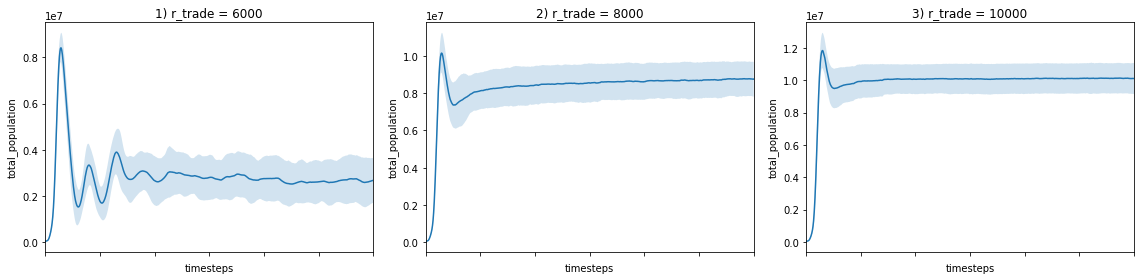

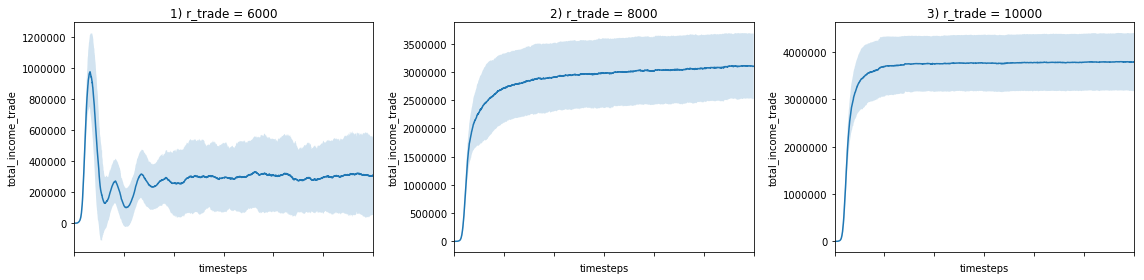

In [3]:
pylab.rcParams['figure.figsize'] = (16, 4)

r_trades = data.index.levels[0].values

fig, plots = plot('total_population', data)

fig, plots = plot('total_income_trade', data)

**The plots above show the long run data (aggregated from 50 runs) for total population and total income from trade**

We see:

* an overshoot and collapse behavior with fluctuation in the long run for possible income from trade, 
* some sort of saturation for intermediate income from taded and 
* an even quicker saturation for high possible income from trade.

To get some more information, a closer look at individual trajectories is required.

In [4]:
location = '/home/jakob/Project_MayaSim/Python/output_data/X8_longterm_dynamics/results/all_trajectories'
all_data = pd.read_pickle(location)

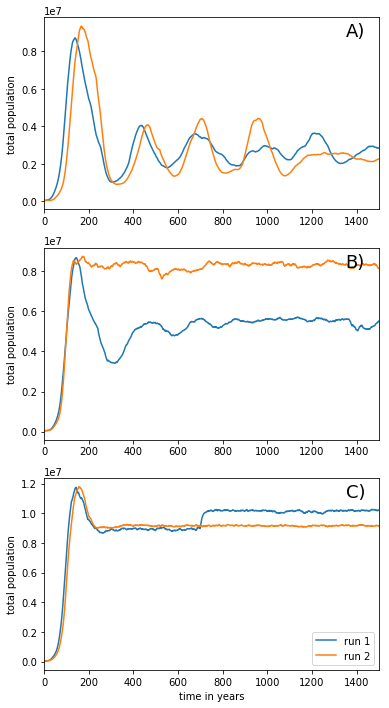

In [49]:
pylab.rcParams['figure.figsize'] = (6, 12)
all_data.columns = range(0,50)
all_data.loc[6000, 1]

runs  = range(0, 50)
r_trades = all_data.index.values
fig = plt.figure()

annotations=['A)', 'B)', 'C)']
for i, r_trade in enumerate(r_trades):
    
    ax = fig.add_subplot(3, 1, i + 1)
    observable = 'total_population'

    for run in [1,5]:
        all_data.loc[r_trade, run][observable].plot(legend=(True if i == len(r_trades) - 1 else False))
    ax.set_xlim([0,1500])
    ax.annotate(annotations[i], xy=(0,0), xycoords='data', xytext=(0.9, 0.9), textcoords='axes fraction', fontsize=18)
    ax.set_ylabel('total population')
    if i == len(r_trades)-1:
        ax.set_xlabel('time in years')
        leg = ax.get_legend()
        for j, text in enumerate(leg.get_texts()):
            text.set_text('run {}'.format(j+1))

plt.savefig('longterm_population_development.pdf')

**The plots above show the total population of single two single runs for different possible trade income.**

We see:

* cyclical rise and fall for low possible income from trade,
* stable society with high trade income with higher possible income from trade

This is in accordance with findings in archeological reserach that state that there have been cycles of growth and collapse in the Maya civilisation from 2000 BC to ~ 0 BC and that only after that in the socalled Classical Period a signifficant overshoot and collapse without recovery was observed.

In our model, this can be reproduced via an increase in trade efficiency, that leads to qualitatively different model behavior.

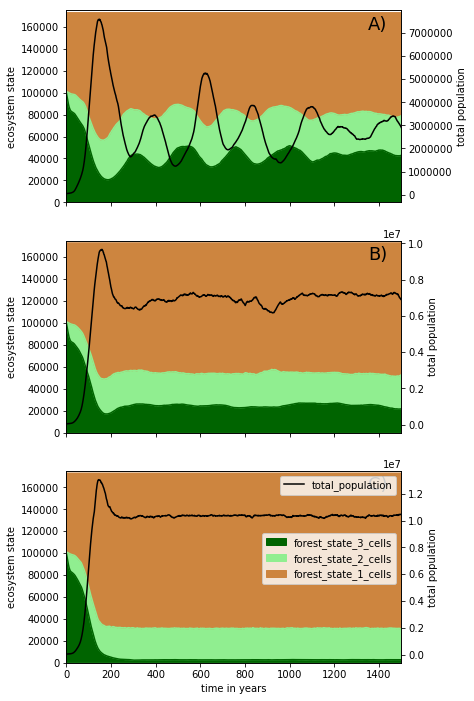

In [93]:
pylab.rcParams['figure.figsize'] = (6, 12)
all_data.columns = range(0,50)
all_data.loc[6000, 1]

runs  = range(0, 50)
r_trades = all_data.index.values
fig = plt.figure()

annotations=['A)', 'B)', 'C)']
for i, r_trade in enumerate(r_trades):
    
    ax = fig.add_subplot(3, 1, i + 1)
    observables = ['forest_state_3_cells', 'forest_state_2_cells', 'forest_state_1_cells']

    run = 2
    ln1 = all_data.loc[r_trade, run][observables].plot.area(stacked=True, 
                                                      legend=(True if i == len(r_trades) - 1 else False), 
                                                      ax=ax,
                                                      color=['darkgreen', 'lightgreen', 'peru'])
    ax2 = ax.twinx()
    ln2 = all_data.loc[r_trade, run]['total_population'].plot(legend=(True if i == len(r_trades) - 1 else False), ax=ax2, color='k')
    #print(all_data.loc[r_trade, run][observables])
    ax.set_xlim([0,1500])
    ax.annotate(annotations[i], xy=(0,0), xycoords='data', xytext=(0.9, 0.9), textcoords='axes fraction', fontsize=18)
    ax2.set_ylabel('total population')
    ax.set_ylabel('ecosystem state')
    ax.set_ylim([0, 175000])
    if i == len(r_trades)-1:
        ax.set_xlabel('time in years')
        lgd2 = ax.get_legend()
        lgd2.set_bbox_to_anchor([1, 0.7])

plt.savefig('longterm_population_development.pdf')